In [1]:
import cv2 as cv
from Visualization import *
from hough_transform import *

import random as rand
import re

import os

Visualization.py loaded


In [2]:
video_dir = os.path.join('Lane_Parameters', 'Lane_Videos')
lane_dir = os.path.join('Lane_Parameters', 'Lane_Parameters')
def get_video(video_num):
    return os.path.join(video_dir, 'IMG_'+ video_num + '.MOV')


def get_lanes(video_num, frame_num, factor = 1):
    
    p = re.compile('[0-9]*,[0-9]*')
    file = open(os.path.join(lane_dir, video_num, str(frame_num) + '.txt'))
    lanes = []

    for line in file:
        points = p.findall(line)
        for i, point in enumerate(points):
            points[i] = tuple(map(int, point.split(',')))
            points[i] = int(points[i][0]/factor), int(points[i][1]/factor)
        
        lanes.append(points)
    file.close()
    return lanes

In [3]:
def draw_dots(img, dots, radius=2, color=(255,0,0), thickness=2):
    for dot in dots:
        img = cv.circle(img, dot, 2, color, thickness)
    return img

def draw_lanes(img_org, lanes, radius=3, colorLst=None, thickness=2):
    img = img_org.copy()
    for lane in lanes:
        color = None
        if colorLst is None:
            color = random_color()
        img = draw_dots(img, lane, radius, color, thickness)
    return img

rand.seed(10)
def random_color():
    return rand.randint(0,255), rand.randint(0,255), rand.randint(0,255)

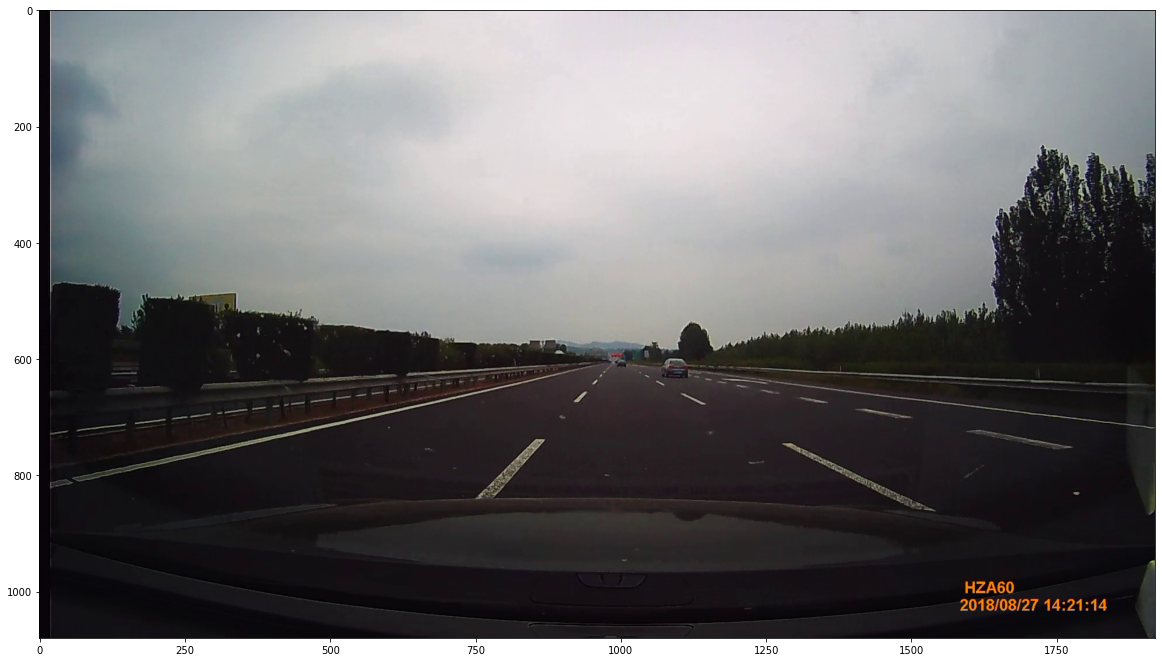

In [4]:
video_num = '0250'
vid = cv.VideoCapture(get_video(video_num))

frame_num = 1000

for i in range(frame_num):
    sucess, orignal_frame = vid.read()
    if not sucess:
        break
vid.release()


img = orignal_frame.copy()

factor = 2

img = cv.resize(img,(0,0), fx=1/factor, fy=1/factor)

PLTdraw(orignal_frame)

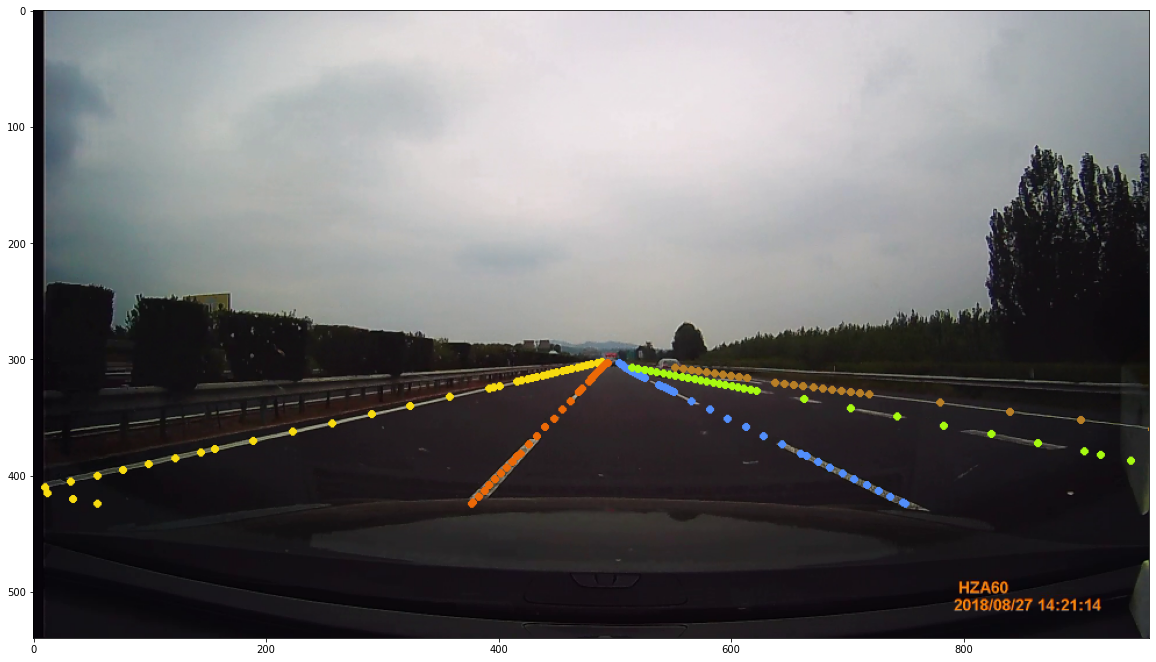

In [5]:
lanes = get_lanes(video_num, frame_num, factor)
doted = draw_lanes(img, lanes)
PLTdraw(doted)

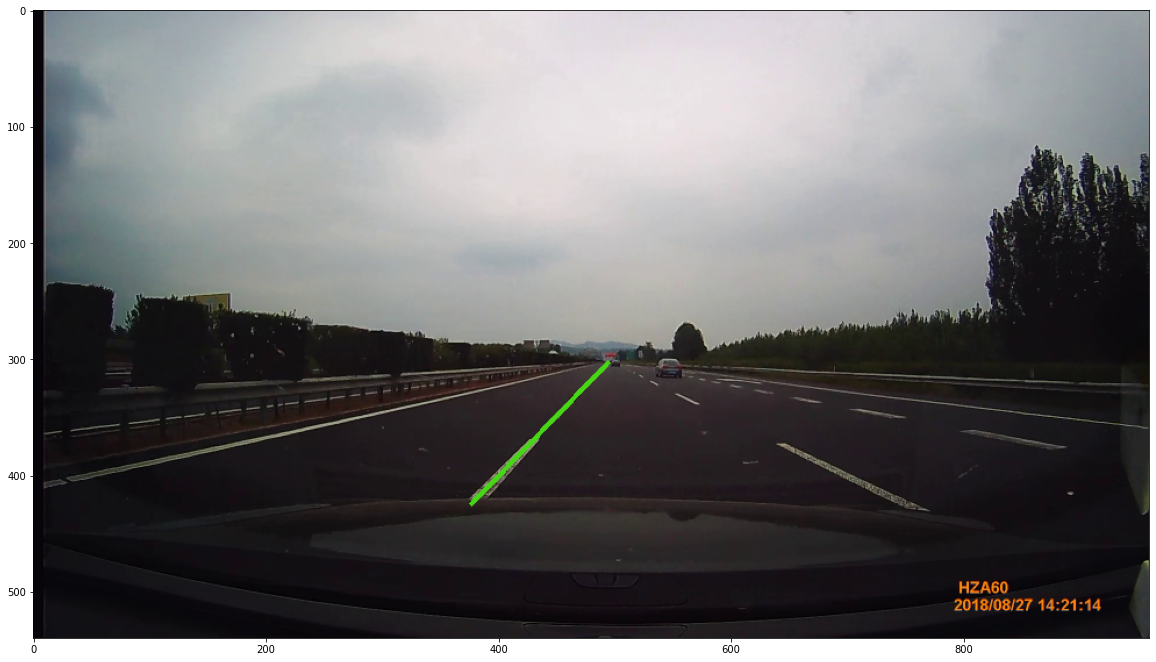

In [6]:
draw_lines = cv.line(img.copy(), lanes[1][0],lanes[1][-1], random_color(),3)
PLTdraw(draw_lines)